In [ ]:
cd # 絶対パスを指定

/content/drive/My Drive/Colab Notebooks/UNet_brain_mri


In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

import torch

In [ ]:
from utils.dataloader import make_datapath_list, DataTransform, BrainDataset
rootpath = os.path.abspath("")
makepath = make_datapath_list(rootpath)
test_img_list, test_anno_list = makepath.get_list("test")

In [ ]:
from utils.unet import Unet256
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = Unet256((3, 256, 256)).to(device)
state_dict = torch.load('/content/drive/My Drive/Colab Notebooks/UNet_brain_mri/weights/Unet_model_15.pth', map_location={"cuda:0": "cpu"})
net.load_state_dict(state_dict)
net.to(device)

Unet256(
  (down1): StackEncoder(
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (block): Sequential(
      (0): ConvBlock(
        (conv): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (batchnorm): BatchNorm2d(12, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (1): ConvBlock(
        (conv): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (batchnorm): BatchNorm2d(12, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
    )
  )
  (down2): StackEncoder(
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (block): Sequential(
      (0): ConvBlock(
        (conv): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (batchnorm): BatchNorm2d(24, eps=0.0001, momentum=0.1, a

In [ ]:
from utils.unet256_show import  UNet_show_image

In [ ]:
unet_show = UNet_show_image(test_img_list, test_anno_list, net, 256, device)
result_img = unet_show.show_and_save_image(20)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


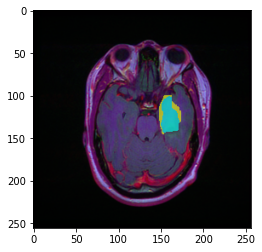

In [ ]:
plt.imshow(result_img)
plt.show()

## 推論結果を可視化した画像を保存

In [ ]:
import re
for idx, img_path in enumerate(test_img_list):
  save_name = "result_image/"+re.split("[/.]", test_img_list[idx])[-2]+"_result.png"
  result_img = unet_show.show_and_save_image(idx)
  cv2.imwrite(save_name, result_img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
